Source and inspiration 
https://www.kaggle.com/krnilo/customer-reviews-analysis-brazilian-e-commerce

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pandas as pd
from collections import Counter
pd.set_option('display.max_columns', 50)
from googletrans import Translator
from tqdm import tqdm

In [164]:
orders = pd.read_csv('../Data/Processed/orders.csv', encoding='utf-8')

In [165]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [166]:
orders.order_status.unique()

array(['delivered', 'canceled', '2017-09-11 01:28:36',
       '2017-09-21 12:25:26'], dtype=object)

# 1. Descriptive analysis

https://www.kaggle.com/krnilo/customer-reviews-analysis-brazilian-e-commerce

In [167]:
orders['comment_present'] = orders.review_comment_message != 'O cliente não comentou'

(<seaborn.axisgrid.FacetGrid at 0x281eaf6e1d0>, count    95978.000000
 mean         4.144356
 std          1.294795
 min          1.000000
 25%          4.000000
 50%          5.000000
 75%          5.000000
 max          5.000000
 Name: review_score, dtype: float64)

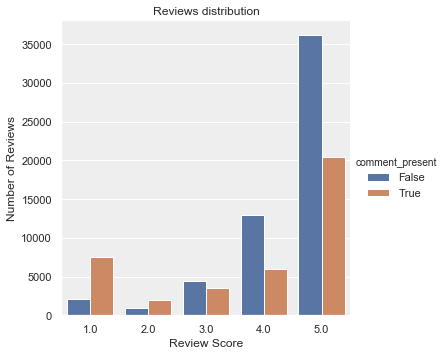

In [168]:
sns.catplot(x='review_score', kind='count', data=orders, hue='comment_present')\
.set(xlabel='Review Score', ylabel='Number of Reviews', title='Reviews distribution'), orders.review_score.describe()

Most reviews are good ones, we can see that the average review score is 4.14, with a median at 5. However, we notice that the number of reviews with a score of 1 is bigger than 2/3 score. Furthemore, almost half of the orders did not receive any customer feedback. Looking at the difference between 1 score reviews and 5 ones, we notice that customers who answered positively in the survey are less likely to leave comments while customers who gave bad feedback are more likely to do it.

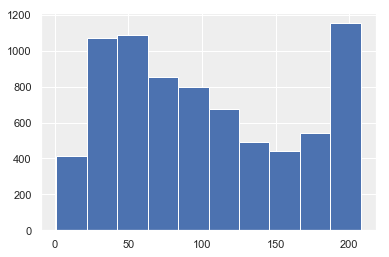

In [169]:
orders[(orders['comment_present'] == True) & (orders['review_score'] == 1)].review_comment_message.map(lambda x : len(str(x))).hist()

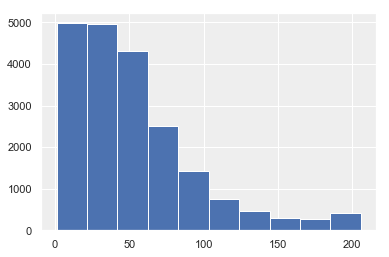

In [170]:
orders[(orders['comment_present'] == True) & (orders['review_score'] == 5)].review_comment_message.map(lambda x : len(str(x))).hist()

Finally, when looking at the survey comments between negative (score = 1) and positive (score = 5) feedbacks, we notice that positive feedbacks tend to be shorter and less succint than negative ones. 

# 2. Sentiment Analysis

Now, let's dive into the content of those comments and see the difference between bad an positive ones. We will try to discover if there are recurrent pattern regarding negative or positive patterns, i.e, what were the customers complaining about or what did they really like ? 

Hence, we will only focus on orders for which the customers did leave an answer in the survey and for which the review score is 1 or 5. For those which they did not, we we will try to discover with the other features what could have gone wrong.

In [171]:
orders_commented = orders[orders['comment_present'] == True]
orders_commented = orders_commented[(orders_commented['review_score'] == 1) | (orders_commented['review_score'] == 5)]

## 2.1 Satisfaction answer delay

In [172]:
orders_commented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27903 entries, 3 to 95977
Data columns (total 37 columns):
order_id                         27903 non-null object
customer_id                      27903 non-null object
order_status                     27903 non-null object
order_purchase_timestamp         27903 non-null object
order_approved_at                27903 non-null object
order_delivered_carrier_date     27903 non-null object
order_delivered_customer_date    27903 non-null object
order_estimated_delivery_date    27903 non-null object
payment_sequential               27903 non-null float64
payment_type                     27903 non-null object
payment_installments             27903 non-null float64
payment_value                    27903 non-null float64
customer_unique_id               27903 non-null object
customer_zip_code_prefix         27903 non-null float64
customer_city                    27903 non-null object
customer_state                   27903 non-null object
review_

In [173]:
orders_commented = orders_commented.astype({"order_status" : 'category', \
                       "order_purchase_timestamp" : 'datetime64[ns]', "order_approved_at" : 'datetime64[ns]', \
                       "order_delivered_carrier_date" : 'datetime64[ns]', "order_delivered_customer_date" : 'datetime64[ns]', \
                       "order_estimated_delivery_date" : 'datetime64[ns]', 'review_creation_date':'datetime64[ns]', \
                        "review_answer_timestamp" : 'datetime64[ns]', "shipping_limit_date" : 'datetime64[ns]', \
                        "product_category_name" : 'category', 
                       })

In [174]:
orders_commented['delay'] = ((orders_commented['review_answer_timestamp'] - orders_commented['review_creation_date']).dt.days)

In [175]:
bins = [-1, 0, 1, 2, 3, 99999]
labels = ['0', '1', '2', '3', '4+']
orders_commented['delay_group'] = pd.cut(orders_commented['delay'], bins, labels=labels)


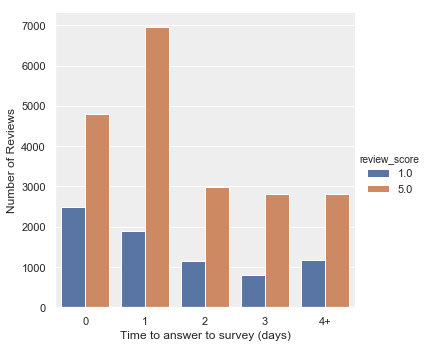

In [176]:
sns.catplot(
    x='delay_group', 
    kind='count', 
    data=orders_commented,
    hue='review_score',
).set(xlabel='Time to answer to survey (days)', ylabel='Number of Reviews');

Looking at the plot above, we see that customers who answered negatively tends to answer earlier than customers with positive experience.

## 2.2 Customer Experience

What customers like and dislike the most about Olist's experience ? 

In [177]:
import nltk
from wordcloud import WordCloud
import unicodedata

In [178]:
def remove_accents(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', errors='ignore').decode('utf-8')

STOP_WORDS = set(remove_accents(w) for w in nltk.corpus.stopwords.words('portuguese'))
STOP_WORDS.remove('nao') # This word is key to understand delivery problems later


def comments_to_words(comment):
    lowered = comment.lower()
    normalized = remove_accents(lowered)
    tokens = nltk.tokenize.word_tokenize(normalized)
    words = tuple(t for t in tokens if t not in STOP_WORDS and t.isalpha())
    return words

def words_to_ngrams(words):
    unigrams, bigrams, trigrams = [], [], []
    for comment_words in words:
        unigrams.extend(comment_words)
        bigrams.extend(' '.join(bigram) for bigram in nltk.bigrams(comment_words))
        trigrams.extend(' '.join(trigram) for trigram in nltk.trigrams(comment_words))
    
    return unigrams, bigrams, trigrams

def plot_freq(tokens, color):
    nltk.FreqDist(tokens).plot(25, cumulative=False, color=color)

In [179]:
orders_commented['review_comment_words'] = orders_commented['review_comment_message'].apply(comments_to_words)

positive_reviews = orders_commented[orders_commented['review_score'] == 5]
negative_reviews = orders_commented[orders_commented['review_score'] == 1]

positive_unigrams, positive_bigrams, positive_trigrams = words_to_ngrams(positive_reviews['review_comment_words'])
negative_unigrams, negative_bigrams, negative_trigrams = words_to_ngrams(negative_reviews['review_comment_words'])

**Are there important topics where extra caution is advised ?**

In [180]:
top20_positive = list(dict(Counter(positive_trigrams).most_common(20)).keys())

In [181]:
top20_negative = list(dict(Counter(negative_trigrams).most_common(20)).keys())

In [182]:
positive_comments = []
negative_comments = []

In [183]:
from googletrans import Translator
from tqdm import tqdm

In [184]:
for i in tqdm(range(len(top20_positive))) :
    translator = Translator()
    positive_comments.append(translator.translate(top20_positive[i], src='Pt', dest='en'))
    negative_comments.append(translator.translate(top20_negative[i], src='Pt', dest='en'))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.42it/s]


In [185]:
positive_comments = list(map(lambda x : x.text, positive_comments))
negative_comments = list(map(lambda x : x.text, negative_comments))

In [186]:
comments_topics = pd.DataFrame({'positive_comments' : positive_comments, 'negative_comments' : negative_comments})

In [187]:
comments_topics

,positive_comments,negative_comments
0,arrived before deadline,I did not recieve the product
1,well before term,I have not received it yet.
2,delivered before term,product not delivered
3,delivery before term,product has not arrived
4,product arrived before,product not yet
5,arrived well before,it did not arrive yet
6,product delivered before,I did not receive the moment
7,Super fast delivery,not yet delivered
8,great quality product,I have not received it now
9,ahead of schedule,Related searches


When looking at the table :
    - We got positive feedback from the customers mainly because the delivery service was great in terms of delivery time and because of the good product quality.
    - Among negative sentiments however, the customers complains about the  delivery service : they either received the wrong product or they had to answer the survey before even getting the product. Furthermore, they also complained a lot about the bad quality of the product and want a refund.

In [188]:
np.save('comments_topics.npy', comments_topics)

**Hence, during our Customer sentiment analysis, we noticed some directions where Olist can elaborate strategies for customer retentions. Although most customers seem happy, since the average score is 4.1, some of them are still not satisfied enough. Since we know that customer acquisition may be sometimes harder than customer retention, we advise Olist to pay attention to the sectors where customers are mainly satisfied (product quality and delivery service quality) and to be even more careful why in the same areas some customers are not satisfied enough. We may want to further this analysis, taking into account that there are lot of sellers in Olist platform, and it might be a good idea to spot which sellers do provide a lower quality product and delivery service to present to the stakeholders which will be in charge of taking actual decisions.**

# 3 Silent customers

Some customers didn't write a review. But why are they happy or mad?

In [195]:
silent_orders = orders[orders['comment_present'] == False]
silent_orders = silent_orders[(silent_orders['review_score'] == 1) | (silent_orders['review_score'] == 5)]

In [196]:
silent_orders = silent_orders.astype({"order_status" : 'category', \
                       "order_purchase_timestamp" : 'datetime64[ns]', "order_approved_at" : 'datetime64[ns]', \
                       "order_delivered_carrier_date" : 'datetime64[ns]', "order_delivered_customer_date" : 'datetime64[ns]', \
                       "order_estimated_delivery_date" : 'datetime64[ns]', 'review_creation_date':'datetime64[ns]', \
                        "review_answer_timestamp" : 'datetime64[ns]', "shipping_limit_date" : 'datetime64[ns]', \
                        "product_category_name" : 'category', 
                       })

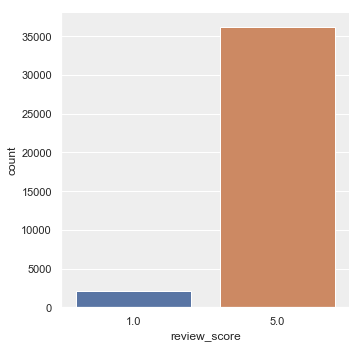

In [197]:
sns.catplot(
    x='review_score', 
    kind='count', 
    data=silent_orders)

In [202]:
negative_silent_orders = silent_orders[silent_orders['review_score'] == 1]

In [203]:
negative_silent_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,comment_present
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,boleto,1.0,35.95,39382392765b6dc74812866ee5ee92a7,99655.0,faxinalzinho,RS,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1.0,O cliente não comentou,O cliente não comentou,2017-02-03,2017-02-05 01:58:35,1.0,63b9ae557efed31d1f7687917d248a8d,ac1789e492dcd698c5c10b97a671243a,2017-01-27 18:29:09,19.9,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0,False
71,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12,1.0,boleto,1.0,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804.0,cascavel,PR,fd793fea4f4a2ddcc956561144b6c04e,1.0,O cliente não comentou,O cliente não comentou,2017-05-11,2017-05-12 11:25:49,5.0,c8417879a15366a17c30af34c798c332,a5a0e71a81ae65aa335e71c06261e260,2017-04-27 05:15:56,190.0,77.80,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,False
93,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,1.0,credit_card,5.0,101.74,781ae350edb16842380e81d7c7feb431,20740.0,rio de janeiro,RJ,1dbe272d8884775c73d0d164bd1ff844,1.0,O cliente não comentou,O cliente não comentou,2017-12-13,2017-12-19 22:50:36,1.0,4a3ca9315b744ce9f8e9374361493884,f8a8f05a35976a91aed5cccc3992c357,2017-11-28 11:46:50,83.9,17.84,moveis_decoracao,63.0,418.0,1.0,1500.0,45.0,15.0,35.0,False
241,f31535f21d145b2345e2bf7f09d62322,ed532487db04478dfba09d112649fc13,delivered,2018-02-01 07:47:34,2018-02-01 08:10:31,2018-02-02 00:24:34,2018-04-23 15:49:34,2018-03-05,2.0,voucher,1.0,100.00,51ac8560948d44d4ffa33f2680569a20,24350.0,niteroi,RJ,64c5384f6f6ccdb5b514f1ebfbba5a03,1.0,O cliente não comentou,O cliente não comentou,2018-03-07,2018-03-07 12:30:01,1.0,91f0eec23d4a61d7d7caeefa3f0ad1ca,f196248e8b5d060cca414a664ea9a76f,2018-02-08 08:10:31,199.0,24.26,automotivo,58.0,1167.0,1.0,1900.0,90.0,14.0,18.0,False
309,16c24987724018f73b746aacfbb5f8e8,ffdc2af7160aed3bad21cbc8ec68c0c5,delivered,2017-05-20 02:48:00,2017-05-23 03:50:25,2017-06-05 13:58:19,2017-06-16 16:52:02,2017-06-09,1.0,boleto,1.0,180.45,49eb55b407f86a1e87d7898594e65c90,30130.0,belo horizonte,MG,fb7793b81898e28816f37c40bef6c9f8,1.0,O cliente não comentou,O cliente não comentou,2017-06-14,2017-06-14 10:56:09,1.0,973f21788dfab357250f69a8dcb7ddee,f3dbf072e817667fbde052aae313cce1,2017-05-29 03:50:25,135.0,45.45,esporte_lazer,45.0,599.0,1.0,18500.0,22.0,26.0,15.0,False


In [206]:
negative_silent_orders.order_status.unique(), negative_silent_orders.shape

([delivered]
 Categories (1, object): [delivered], (2080, 37))

It seems that all orders have been submitted, but when ? Let's try to find out ! 

In [209]:
late_deliveries = negative_silent_orders[negative_silent_orders['order_delivered_customer_date'] > negative_silent_orders['order_estimated_delivery_date']]

In [211]:
late_deliveries.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,comment_present
93,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,1.0,credit_card,5.0,101.74,781ae350edb16842380e81d7c7feb431,20740.0,rio de janeiro,RJ,1dbe272d8884775c73d0d164bd1ff844,1.0,O cliente não comentou,O cliente não comentou,2017-12-13,2017-12-19 22:50:36,1.0,4a3ca9315b744ce9f8e9374361493884,f8a8f05a35976a91aed5cccc3992c357,2017-11-28 11:46:50,83.9,17.84,moveis_decoracao,63.0,418.0,1.0,1500.0,45.0,15.0,35.0,False
241,f31535f21d145b2345e2bf7f09d62322,ed532487db04478dfba09d112649fc13,delivered,2018-02-01 07:47:34,2018-02-01 08:10:31,2018-02-02 00:24:34,2018-04-23 15:49:34,2018-03-05,2.0,voucher,1.0,100.00,51ac8560948d44d4ffa33f2680569a20,24350.0,niteroi,RJ,64c5384f6f6ccdb5b514f1ebfbba5a03,1.0,O cliente não comentou,O cliente não comentou,2018-03-07,2018-03-07 12:30:01,1.0,91f0eec23d4a61d7d7caeefa3f0ad1ca,f196248e8b5d060cca414a664ea9a76f,2018-02-08 08:10:31,199.0,24.26,automotivo,58.0,1167.0,1.0,1900.0,90.0,14.0,18.0,False
309,16c24987724018f73b746aacfbb5f8e8,ffdc2af7160aed3bad21cbc8ec68c0c5,delivered,2017-05-20 02:48:00,2017-05-23 03:50:25,2017-06-05 13:58:19,2017-06-16 16:52:02,2017-06-09,1.0,boleto,1.0,180.45,49eb55b407f86a1e87d7898594e65c90,30130.0,belo horizonte,MG,fb7793b81898e28816f37c40bef6c9f8,1.0,O cliente não comentou,O cliente não comentou,2017-06-14,2017-06-14 10:56:09,1.0,973f21788dfab357250f69a8dcb7ddee,f3dbf072e817667fbde052aae313cce1,2017-05-29 03:50:25,135.0,45.45,esporte_lazer,45.0,599.0,1.0,18500.0,22.0,26.0,15.0,False
600,b7ed5b357d48b6c8f588c5cf0d7ddf5d,92148a85c89c0da621cdc0e1810a23f7,delivered,2018-03-10 23:24:50,2018-03-11 00:00:30,2018-03-12 17:08:26,2018-04-17 17:37:54,2018-04-02,1.0,credit_card,10.0,173.53,5d81094365fbd7cb0e548f4508fa5e62,26070.0,nova iguacu,RJ,0e292b0d5837bdefe75d8c1b1758ac6a,1.0,O cliente não comentou,O cliente não comentou,2018-04-04,2018-04-04 08:39:27,1.0,da8622b14eb17ae2831f4ac5b9dab84a,9565229244e9341fb8c8069879cf73cd,2018-03-15 00:00:30,149.9,23.63,cama_mesa_banho,60.0,234.0,1.0,1700.0,34.0,7.0,32.0,False
631,cafc9b2f7d35ec42bdb74347cc6e8a70,c9573cc1e246dadca50b2a74f795def3,delivered,2018-01-19 00:48:30,2018-01-19 01:21:52,2018-01-19 22:41:38,2018-04-04 17:12:36,2018-02-16,1.0,credit_card,1.0,55.63,7671178c592895e5beed747367b4a54b,60833.0,fortaleza,CE,10fff4faa197b0a1b7d7b087a7cb1836,1.0,O cliente não comentou,O cliente não comentou,2018-02-18,2018-02-18 17:28:40,1.0,b561927807645834b59ef0d16ba55a24,c5841303f830680eb1cdda8be0ff35bf,2018-01-25 01:21:52,38.0,17.63,papelaria,33.0,691.0,2.0,250.0,27.0,3.0,11.0,False


In [210]:
late_deliveries.shape

(1047, 37)

Interesting ! It seems that half of the negative reviews which resulted in not answering to the customer satisfaction survey were orders which actually arrived but late . Let's look at the distribution of the delays.

In [212]:
late_deliveries['delay'] = ((late_deliveries['order_delivered_customer_date'] - late_deliveries['order_estimated_delivery_date']).dt.days)

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


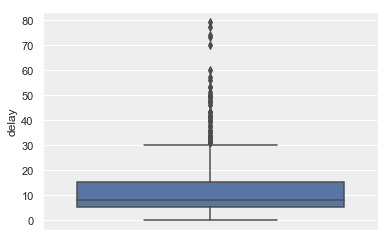

In [219]:
sns.boxplot(y='delay', data=late_deliveries)

Let's have a look at the time they received the survey and the time they received the products.

In [227]:
late_deliveries['delivery_to_survey_delay'] = ((late_deliveries['review_creation_date'] - late_deliveries['order_delivered_customer_date']).dt.days)

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


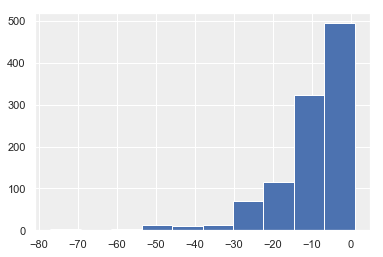

In [232]:
late_deliveries.delivery_to_survey_delay.hist()

As we noticed earlier for non silent customers, Olist platform tend to send customer satisfaction survey to customer way before they actually received the product. 

Let's look at the customers who did not receive their product late.

In [233]:
on_time_deliveries = negative_silent_orders[negative_silent_orders['order_delivered_customer_date'] <= negative_silent_orders['order_estimated_delivery_date']]

In [236]:
on_time_deliveries.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,comment_present
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,boleto,1.0,35.95,39382392765b6dc74812866ee5ee92a7,99655.0,faxinalzinho,RS,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1.0,O cliente não comentou,O cliente não comentou,2017-02-03,2017-02-05 01:58:35,1.0,63b9ae557efed31d1f7687917d248a8d,ac1789e492dcd698c5c10b97a671243a,2017-01-27 18:29:09,19.90,16.05,moveis_decoracao,41.0,432.0,2.0,300.0,35.0,35.0,15.0,False
71,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12,1.0,boleto,1.0,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804.0,cascavel,PR,fd793fea4f4a2ddcc956561144b6c04e,1.0,O cliente não comentou,O cliente não comentou,2017-05-11,2017-05-12 11:25:49,5.0,c8417879a15366a17c30af34c798c332,a5a0e71a81ae65aa335e71c06261e260,2017-04-27 05:15:56,190.00,77.80,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,False
414,5a0e5ad33542c79b10be87a344ee0086,917149651e472bef5b609eb58e742eb4,delivered,2017-06-13 11:13:38,2017-06-15 03:03:40,2017-06-16 15:37:52,2017-06-19 18:06:01,2017-07-04,1.0,boleto,1.0,86.67,572e9e13a44a5e4ac5c42e74b324244f,75705.0,catalao,GO,298a8ef64cf5aced55964933cedc056a,1.0,O cliente não comentou,O cliente não comentou,2017-06-21,2017-06-24 00:37:45,1.0,376a891762bbdecbc02b4b6adec3fdda,622bad99b4296aade0783ebecdd3fa15,2017-06-21 03:03:40,73.90,12.77,esporte_lazer,47.0,1249.0,1.0,400.0,27.0,6.0,25.0,False
565,6ac882284d5fcde113962e178ba0edbb,1bd00f336a9c3b3c35a720f715e7fe58,delivered,2017-12-07 15:40:14,2017-12-12 03:49:32,2017-12-13 22:07:57,2017-12-20 19:05:03,2018-01-09,1.0,boleto,1.0,48.60,620123772a3dcba2bd22515fb40e1fb3,8790.0,mogi das cruzes,SP,4a26f927e05475a99317fcb4c0ec39a8,1.0,O cliente não comentou,O cliente não comentou,2017-12-21,2017-12-21 21:48:12,1.0,86ccac0b835037332a596a33b6949ee1,88bcd4cc43e257bf69ac62b2540f1c14,2017-12-18 03:49:32,33.50,15.10,relogios_presentes,55.0,384.0,1.0,450.0,25.0,10.0,25.0,False
607,01835ef41c5ac66dd9ec6084fa1d0533,6a4ea2081853cd8dd8d7c69cdf86925a,delivered,2017-05-11 21:36:10,2017-05-11 21:45:17,2017-05-16 08:54:10,2017-05-23 22:13:35,2017-06-01,1.0,credit_card,1.0,72.14,f64ee7b44a9c2170a0db74d6bc3d1ba8,28027.0,campos dos goytacazes,RJ,d59858813df002a1fbbc21bf4f66e9e0,1.0,O cliente não comentou,O cliente não comentou,2017-05-24,2017-05-27 13:16:16,1.0,cc419e0650a3c5ba77189a1882b7556a,bbaef2eadf31fe3ea6702077398be06c,2017-05-18 21:45:17,56.99,15.15,perfumaria,45.0,1003.0,2.0,400.0,18.0,11.0,11.0,False


In [238]:
on_time_deliveries['delivery_delay'] = ((on_time_deliveries['order_estimated_delivery_date'] - on_time_deliveries['order_approved_at']).dt.days)

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


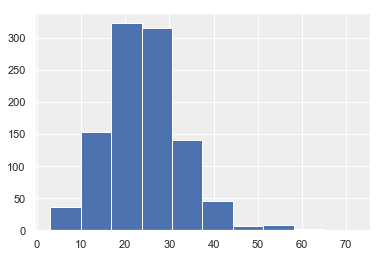

In [240]:
delivery_delay.hist()

Let's spot the difference with happy silent customers.

In [241]:
positive_silent_orders = silent_orders[silent_orders['review_score'] == 5]
positive_silent_orders['delivery_delay'] = ((positive_silent_orders['order_estimated_delivery_date'] - positive_silent_orders['order_approved_at']).dt.days)

C:\Anaconda\envs\ada\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


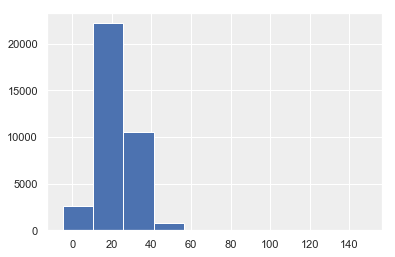

In [242]:
positive_silent_orders.delivery_delay.hist()

It looks the same... maybe it has something to do with the product ! 

## Topic modelling

In [285]:
orders.order_approved_at.dtypes

dtype('O')

In [337]:
orders.order_approved_at

0        2017-10-02 11:07:15
1        2018-07-26 03:24:27
2        2018-08-08 08:55:23
3        2017-11-18 19:45:59
4        2018-02-13 22:20:29
5        2017-07-09 22:10:13
6        2017-05-16 13:22:11
7        2017-01-25 02:50:47
8        2017-07-29 12:05:32
9        2017-05-16 19:50:18
10       2017-07-13 20:10:08
11       2018-06-09 03:13:12
12       2018-07-25 17:55:14
13       2018-03-01 15:10:47
14       2018-06-12 23:31:02
15       2018-01-02 19:09:04
16       2017-12-26 23:50:22
17       2017-11-21 00:14:22
18       2017-10-26 16:08:14
19       2017-09-19 04:04:09
20       2018-03-15 09:09:31
21       2018-02-03 20:50:22
22       2018-01-08 08:07:31
23       2018-08-10 03:24:51
24       2018-02-22 02:30:46
25       2018-06-05 00:35:10
26       2018-03-12 03:28:34
27       2018-05-03 12:55:01
28       2018-02-25 14:47:35
29       2017-08-12 02:45:24
                ...         
95950    2017-09-05 04:10:34
95951    2018-07-23 12:32:05
95952    2017-11-26 19:53:48
95953    2018-

In [363]:
import datetime
    
def validate(date_text):
    try:
        if date_text != datetime.datetime.strptime(date_text, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d %H:%M:%S'):
            raise ValueError
        return True
    except ValueError:
        return False
    
clean_orders = orders[orders['order_purchase_timestamp'].apply(validate) == True]
clean_orders = clean_orders[clean_orders['order_approved_at'].apply(validate) == True]
clean_orders = clean_orders[clean_orders['order_delivered_carrier_date'].apply(validate) == True]
clean_orders = clean_orders[clean_orders['order_estimated_delivery_date'].apply(validate) == True]

In [364]:
clean_orders.shape, orders.shape

((95978, 37), (95980, 37))

In [365]:
clean_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,comment_present
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,False


In [367]:
clean_orders = clean_orders.astype({"order_status" : 'category', \
                       "order_purchase_timestamp" : 'datetime64[ns]', 
                        "order_approved_at" : 'datetime64[ns]', \
                       "order_delivered_carrier_date" : 'datetime64[ns]', 
                        "order_delivered_customer_date" : 'datetime64[ns]', \
                       "order_estimated_delivery_date" : 'datetime64[ns]', 
                        'review_creation_date':'datetime64[ns]', \
                        "review_answer_timestamp" : 'datetime64[ns]', "shipping_limit_date" : 'datetime64[ns]', \
                        "product_category_name" : 'category', 
                       })

In [368]:
clean_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 0 to 95979
Data columns (total 37 columns):
order_id                         95978 non-null object
customer_id                      95978 non-null object
order_status                     95978 non-null category
order_purchase_timestamp         95978 non-null datetime64[ns]
order_approved_at                95978 non-null datetime64[ns]
order_delivered_carrier_date     95978 non-null datetime64[ns]
order_delivered_customer_date    95978 non-null datetime64[ns]
order_estimated_delivery_date    95978 non-null datetime64[ns]
payment_sequential               95978 non-null float64
payment_type                     95978 non-null object
payment_installments             95978 non-null float64
payment_value                    95978 non-null float64
customer_unique_id               95978 non-null object
customer_zip_code_prefix         95978 non-null float64
customer_city                    95978 non-null object
customer_state      

In [476]:
clean_orders['delivery_delay'] = (clean_orders['order_delivered_customer_date'] - clean_orders['order_estimated_delivery_date']).dt.days

In [477]:
average_scores_by_sellers = clean_orders.groupby('seller_id').agg({'review_score' : 'mean', 'delivery_delay' : 'mean'})

In [478]:
average_scores_by_sellers.corr()

,review_score,delivery_delay
review_score,1.000000,-0.300396
delivery_delay,-0.300396,1.000000


In [479]:
average_scores_by_sellers.review_score = average_scores_by_sellers.apply(lambda x : round(x))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000281DCA28B70>,
      dtype=object)

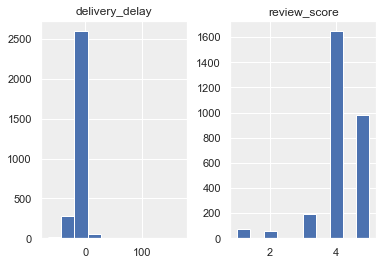

In [480]:
average_scores_by_sellers.hist()

### Clustering the sellers

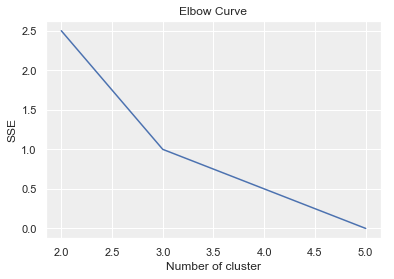

In [488]:
from sklearn.cluster import KMeans

data = average_scores_by_sellers.drop_duplicates(subset='review_score')
sse = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, max_iter=5000).fit(data[['review_score']])
    # Inertia: Sum of distances of samples to their closest cluster center
    sse[k] = kmeans.inertia_

f = plt.plot(list(sse.keys()), list(sse.values()))
abscisse = plt.xlabel("Number of cluster")
ordonne = plt.ylabel("SSE")
title = plt.title('Elbow Curve')
plt.show() 

The optimal number of clusters is 4

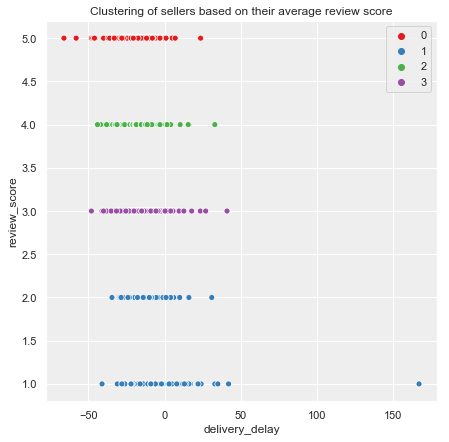

In [491]:
km = KMeans(n_clusters=4, random_state=42).fit(average_scores_by_sellers[['review_score']])
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
sns.scatterplot(x="delivery_delay", y="review_score", hue=labels, data=average_scores_by_sellers, legend="full", palette=sns.color_palette("Set1", n_colors=4))
title = plt.title('Clustering of sellers based on their average review score')
plt.show()

In [277]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,comment_present
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813.0,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,289cdb325fb7e7f891c38608bf9e0962,595fac2a385ac33a80bd5114aec74eb8,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,O cliente não comentou,O cliente não comentou,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,aa4383b373c6aca5d8797843e5594415,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296.0,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,66922902710d126a0e7d26b0e3805106,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-23 19:45:59,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195.0,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,O cliente não comentou,O cliente não comentou,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,2c9e548be18521d1c43cde1c582c6de8,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-19 20:31:37,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,False


In [278]:
orders['delivery_delay'] = orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']

AttributeError: 'DataFrame' object has no attribute 'delay'